In [7]:
import sqlite3
import pandas as pd
import numpy as np
# 连接到数据库文件
conn = sqlite3.connect("../pokemmo.sqlite")
# 创建游标对象
cursor = conn.cursor()

In [8]:
# 执行查询语句
query = """
SELECT x_coords,y_coords,map_number_tuple FROM general_status
where map_number_tuple = '(1, 11, 59)'

"""
cursor.execute(query)

# 获取查询结果
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['x_coords', 'y_coords', 'map_number_tuple'])
df.head()



,x_coords,y_coords,map_number_tuple
0,7,8,"(1, 11, 59)"
1,7,8,"(1, 11, 59)"
2,7,8,"(1, 11, 59)"
3,7,8,"(1, 11, 59)"
4,7,8,"(1, 11, 59)"


In [9]:
numeric_cols = ['x_coords', 'y_coords', 'map_number_tuple']
statistics = df[numeric_cols].describe()
print(statistics)

         x_coords    y_coords
count  256.000000  256.000000
mean     6.703125    5.363281
std      3.817112    1.983476
min      0.000000    2.000000
25%      3.000000    4.000000
50%      7.000000    5.000000
75%     10.000000    7.000000
max     13.000000    8.000000


增加offset

In [10]:
df['new_x']=df['x_coords']
df['new_y'] = df['y_coords']
#df['new_x'] = df.apply(lambda row: row['x_coords'] -21 if row['map_num_3'] == 74 else row['x_coords'], axis=1)
#df['new_y'] = df.apply(lambda row: row['y_coords'] +40 if row['map_number_tuple'] == '(0, 23, 3)' else row['y_coords'], axis=1)

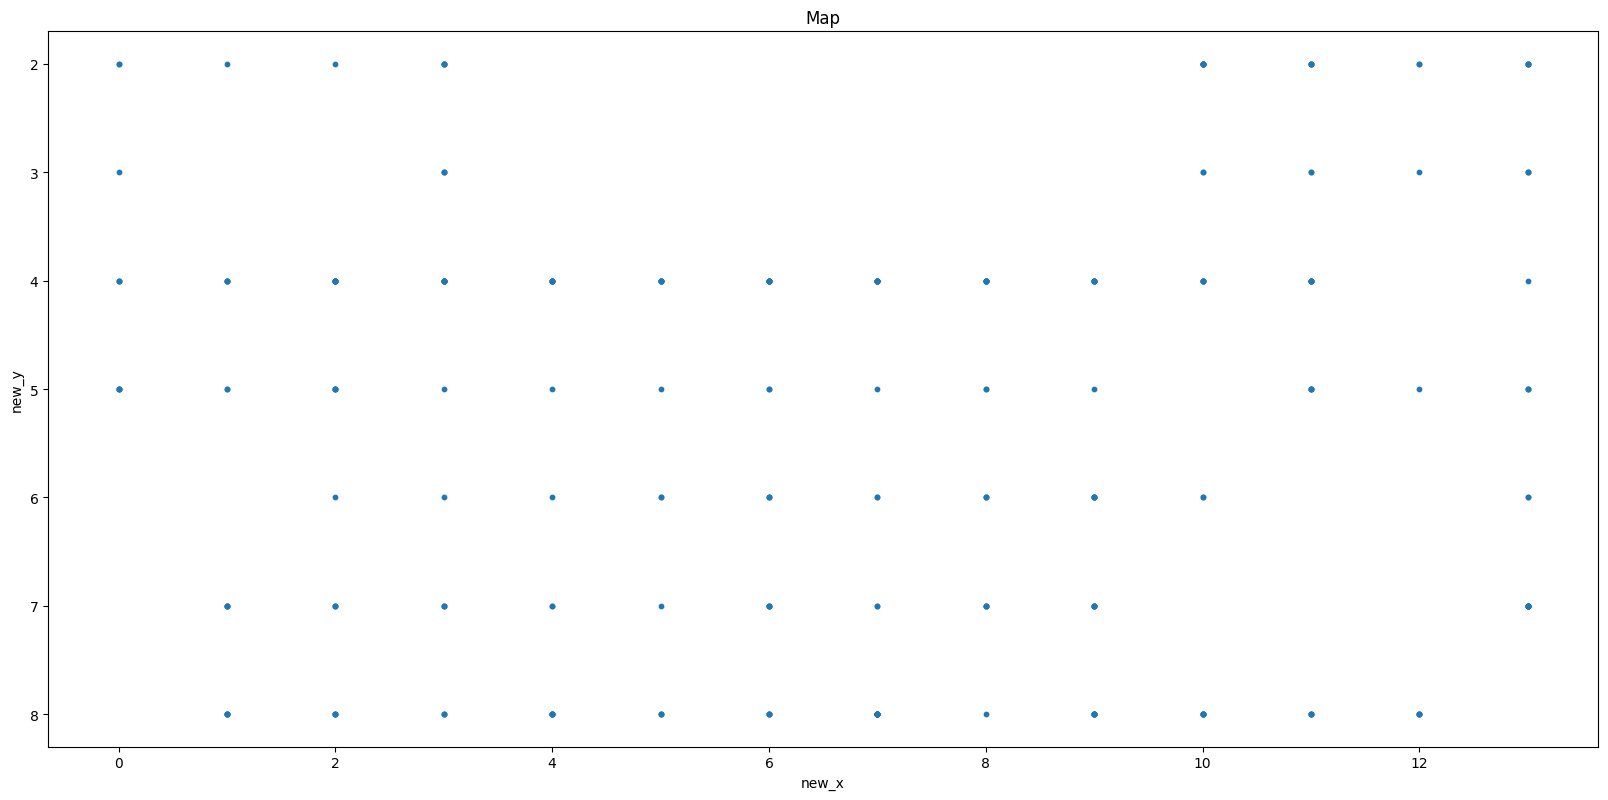

In [11]:
import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots(figsize=(20, 20))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df['new_x'], df['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()


In [13]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)
# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['new_y'].min()), int(df['new_y'].max()) + 1),
                       columns=np.arange(int(df['new_x'].min()), int(df['new_x'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    grid_df.at[int(row['new_y']), int(row['new_x'])] = 4

# # 反转y轴
#grid_df = grid_df.iloc[::-1]

# 导出到Excel
grid_df.to_excel("Hoenn PC coordinates.xlsx")

In [14]:
import sqlite3
import pandas as pd
import numpy as np
df=pd.read_excel("../asserts/coords_tracking/Hoenn PC coordinates.xlsx", index_col=0)
# 先重置索引，这样行标签就变成一列
df = df.reset_index()
df

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2,4.0,4.0,4.0,4,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0
1,3,4.0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0
2,4,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0
3,5,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0,4.0,4.0
4,6,NaN,NaN,4.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,4.0
5,7,NaN,4.0,4.0,4,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,4.0
6,8,NaN,4.0,4.0,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN


In [15]:
# 使用 melt，这会把所有列都转成两列，一列是原来的列名（变量），一列是对应的值
df_melted = df.melt(id_vars='index', var_name='x_coords', value_name='mark')
df_melted

,index,x_coords,mark
0,2,0,4.0
1,3,0,4.0
2,4,0,4.0
3,5,0,4.0
4,6,0,NaN
...,...,...,...
93,4,13,4.0
94,5,13,4.0
95,6,13,4.0
96,7,13,4.0


In [16]:
# 修改列名
df_melted.rename(columns={'index': 'y_coords'}, inplace=True)
df_melted

,y_coords,x_coords,mark
0,2,0,4.0
1,3,0,4.0
2,4,0,4.0
3,5,0,4.0
4,6,0,NaN
...,...,...,...
93,4,13,4.0
94,5,13,4.0
95,6,13,4.0
96,7,13,4.0


In [17]:
# 过滤掉 mark 列为 NaN 的行
df_melted = df_melted.dropna(subset=['mark'])
df_melted

,y_coords,x_coords,mark
0,2,0,4.0
1,3,0,4.0
2,4,0,4.0
3,5,0,4.0
7,2,1,4.0
...,...,...,...
92,3,13,4.0
93,4,13,4.0
94,5,13,4.0
95,6,13,4.0


In [18]:
# 把值为PC_IN的单元格的值改成112
df_melted.loc[df_melted['mark'] == 'pc_in', 'mark'] = 112

df_melted.loc[df_melted['mark'] == 'farming', 'mark'] = 66
# 所有float类型的值转成int
df_melted = df_melted.astype({'mark': 'int'})

df_melted.reset_index(drop=True, inplace=True)

# 输出查看结果
print(df_melted)

    y_coords x_coords  mark
0          2        0     4
1          3        0     4
2          4        0     4
3          5        0     4
4          2        1     4
..       ...      ...   ...
67         3       13     4
68         4       13     4
69         5       13     4
70         6       13     4
71         7       13     4

[72 rows x 3 columns]


In [19]:
df_melted.to_csv('../asserts/coords_tracking/Hoenn_PC_coords_tracking.csv')

In [8]:
# 关闭游标和连接
cursor.close()
conn.close()

NameError: name 'cursor' is not defined